# Probability of Electoral MisAlignment

**(November 15, 2023)**

Our objective is to calculate the Misalignment Probability for the 2020 Election. 



- [Electoral Votes](#section1)
- [Vote-Count Data Collection (2000-2016)](#section2)
    - [Vote-Count 2020 Prediction (Mean and Variance)](#section3)
- [Vote-Margin 2020 Data Collection and Prediction](#section4)
- [Simulations: Probability of Electoral and/or Popular Win](#section5) 
- [Simulations: Probability of Electoral Misalignment](#section6)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from collections import defaultdict

from tqdm.notebook import tqdm

import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

<a id=section1> </a>
## Electoral Votes

In [2]:
# dictionary of electoral votes for districts/states
# will be the lambda vector
electoral_votes = {
    'Alabama': 9,
    'Alaska': 3,
    'Arizona': 11,
    'Arkansas': 6,
    'California': 54,
    'Colorado': 10,
    'Connecticut': 7,
    'Delaware': 3,
    'District of Columbia': 3,
    'Florida': 30,
    'Georgia': 16,
    'Hawaii': 4,
    'Idaho': 4,
    'Illinois': 19,
    'Indiana': 11,
    'Iowa': 6,
    'Kansas': 6,
    'Kentucky': 8,
    'Louisiana': 8,
    'Maine': 2,
    'Maine-1':1, 
    'Maine-2':1, 
    'Maryland': 10,
    'Massachusetts': 11,
    'Michigan': 15,
    'Minnesota': 10,
    'Mississippi': 6,
    'Missouri': 10,
    'Montana': 4,
    'Nebraska': 2,
    'Nebraska-1': 1,
    'Nebraska-2': 1,
    'Nebraska-3': 1,
    'Nevada': 6,
    'New Hampshire': 4,
    'New Jersey': 14,
    'New Mexico': 5,
    'New York': 28,
    'North Carolina': 16,
    'North Dakota': 3,
    'Ohio': 17,
    'Oklahoma': 7,
    'Oregon': 8,
    'Pennsylvania': 19,
    'Rhode Island': 4,
    'South Carolina': 9,
    'South Dakota': 3,
    'Tennessee': 11,
    'Texas': 40,
    'Utah': 6,
    'Vermont': 3,
    'Virginia': 13,
    'Washington': 12,
    'West Virginia': 4,
    'Wisconsin': 10,
    'Wyoming': 3
}


<a id=section2> </a>
## Vote-Count Data Collection (2000-2016)

In [4]:
import collections
collections.Callable = collections.abc.Callable

wikiurl=f"https://en.wikipedia.org/wiki/2016_United_States_presidential_election#Results_by_state"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
find_table=soup.find_all('table',{'class':"wikitable"})

# getting table with electoral votes
for table in find_table:
    if 'Iowa' in str(table) and 'Alabama' in str(table):
        table_key = table

# getting first table
df=pd.read_html(str(table_key))
# convert list to dataframe
pd.DataFrame(df[0])

State ordistrict  \
                                     State ordistrict   
0                                                Ala.   
1                                              Alaska   
2                                               Ariz.   
3                                                Ark.   
4                                              Calif.   
5                                               Colo.   
6                                               Conn.   
7                                                Del.   
8                                                D.C.   
9                                                Fla.   
10                                                Ga.   
11                                             Hawaii   
12                                              Idaho   
13                                               Ill.   
14                                               Ind.   
15                                               Iowa   
16                                               Kan.   
17                                                Ky.   
18                                                La.   
19                                            Maine †   
20  ME-1.mw-parser-output .sr-only{border:0;clip:r...   
21     ME-2Tooltip Maine's 2nd congressional district   
22                                                Md.   
23                                              Mass.   
24                                              Mich.   
25                                              Minn.   
26                                              Miss.   
27                                                Mo.   
28                                              Mont.   
29                                            Nebr. †   
30  NE-1Tooltip Nebraska's 1st congressional district   
31  NE-2Tooltip Nebraska's 2nd congressional district   
32  NE-3Tooltip Nebraska's 3rd congressional district   
33                                               Nev.   
34                                               N.H.   
35                                               N.J.   
36                                               N.M.   
37                                               N.Y.   
38                                               N.C.   
39                                               N.D.   
40                                               Ohio   
41                                              Okla.   
42                                               Ore.   
43                                                Pa.   
44                                               R.I.   
45                                               S.C.   
46                                               S.D.   
47                                              Tenn.   
48                                              Texas   
49                                               Utah   
50                                                Vt.   
51                                                Va.   
52                                              Wash.   
53                                              W.Va.   
54                                               Wis.   
55                                               Wyo.   
56                                              Total   
57                                                NaN   

    Hillary ClintonDemocratic                             \
                        Votes                          %   
0                      729547                     34.36%   
1                      116454                     36.55%   
2                     1161167                     44.58%   
3                      380494                     33.65%   
4                     8753788                     61.73%   
5                     1338870                     48.16%   
6                      897572                     54.57%   
7                      235603                     53.09%   
8               

In [5]:
# list of states in alphabetical order
state_list = list(electoral_votes.keys())

# years in string and integer form
years_string_sans2020 = ['2000', '2004', '2008', '2012', '2016']
years_string = ['2000', '2004', '2008', '2012', '2016', '2020']
years_int_sans2020 = np.array([int(year) for year in years_string_sans2020])
years_int = np.array([int(year) for year in years_string])

# votecount dictionary of dataframes
votecount_df_dict = dict()

for year in tqdm(years_string):
    wikiurl=f"https://en.wikipedia.org/wiki/{year}_United_States_presidential_election#Results_by_state"
    response=requests.get(wikiurl)

    # parse data from the html into a beautifulsoup object
    soup = BeautifulSoup(response.text, 'html.parser')
    find_table=soup.find_all('table',{'class':"wikitable"})

    # getting table with electoral votes
    for table in find_table:
        if 'Iowa' in str(table) and 'Alabama' in str(table):
            table_key = table

    # getting first table
    df=pd.read_html(str(table_key))
    # convert list to dataframe
    df_orig=pd.DataFrame(df[0])

    # dropping the higest level column
    df_drop = df_orig.copy()
    df_drop.columns = df_orig.columns.droplevel()

    # converting state/district name to just state
    df_drop.rename(columns = {df_drop.columns[0]: 'State'}, inplace = True)

    # getting starting index for state names
    row_names = list(df_drop['State'])
    for k in range(len(row_names)): 
        if 'Ala' in str(row_names[k]):
            start_idx = k
            break  

    # getting column name for vote count
    first_level_names = list(df_orig.columns.droplevel(1))
    second_level_names = list(df_orig.columns.droplevel(0))
    for elem1, elem2 in zip(first_level_names, second_level_names):
        if 'Total' in elem1:
            break

    # getting compiling dictionary        
    data_dict = {'State': state_list,
    'Total Votes': np.array(list(df_orig.iloc[k:k+56][(elem1, elem2)])).astype(int)}        

    # creating dataframe for year
    votecount_df_dict[year] = pd.DataFrame.from_dict(data = data_dict)    

  0%|          | 0/6 [00:00<?, ?it/s]

<a id=section3> </a>
### Vote-Count 2020 Prediction (Mean and Variance)

In [6]:
votecount_dict = defaultdict(dict)
for state in state_list:

    # collecting yearly ballot data for state
    ballot_count = list()
    for yr in years_string_sans2020:
        temp_df = votecount_df_dict[yr]
        count = temp_df[temp_df['State']==state]['Total Votes'].iloc[0]
        ballot_count.append(count)
    ballot_count = np.array(ballot_count)    
    
    # fitting linear regression
    linreg = LinearRegression()
    linreg.fit(years_int_sans2020.reshape(-1, 1), ballot_count.reshape(-1, 1))

    # predictions and true values
    predictions = linreg.predict(years_int_sans2020.reshape(-1,1))
    true_values = np.array(ballot_count).reshape(-1, 1)
    
    # mean square error and predicted 2020 result
    pred_result = linreg.predict(np.array([[2020]]))[0][0] 
    mean_sqr_error = mean_squared_error(true_values, predictions)
    
    # adding to dictionary
    votecount_dict[state]['mean'] = pred_result
    votecount_dict[state]['var'] = mean_sqr_error

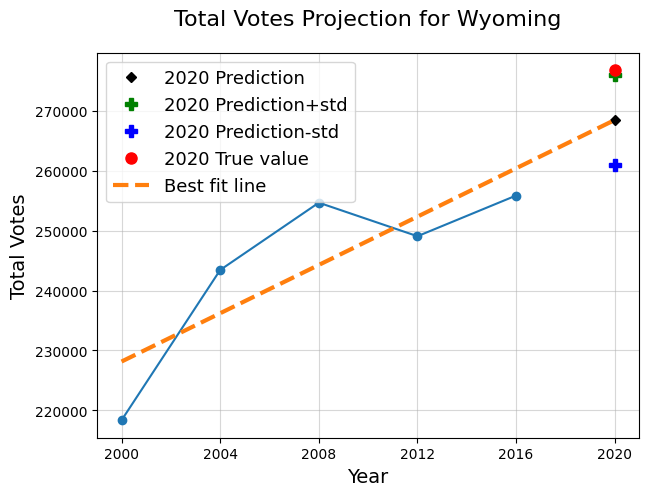

In [8]:
plt.figure(figsize = (7,5))
plt.plot(years_int_sans2020, ballot_count, 'o-')
pred_result = linreg.predict(np.array([2020]).reshape(-1,1))[0][0]

temp_df = votecount_df_dict['2020']

# predictions for 2020 and bounds
plt.plot([2020], [pred_result], 'kD', markersize=5, label = '2020 Prediction')
plt.plot([2020], [pred_result+np.sqrt(mean_sqr_error)], 'gP', markersize=8, label = '2020 Prediction+std')
plt.plot([2020], [pred_result-np.sqrt(mean_sqr_error)], 'bP', markersize=8, label = '2020 Prediction-std')

# true value for 2020
count2020 = temp_df[temp_df['State']==state]['Total Votes'].iloc[0]
plt.plot([2020], [count2020], 'ro', markersize=8, label = '2020 True value')

# coefficient and intercent for best fit line
m, b = linreg.coef_, linreg.intercept_
plt.plot(years_int, (m*years_int+b)[0], linestyle = '--', linewidth = 3, label = 'Best fit line')

plt.legend(fontsize= 13)
plt.xticks(years_int)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total Votes', fontsize = 14)
plt.title(f'Total Votes Projection for {state}', fontsize = 16, y = 1.05)
plt.grid(alpha = 0.5)


In [10]:
# checking accuracy
count=0
for state in state_list:
    temp_df = votecount_df_dict['2020']
    count2020 = temp_df[temp_df['State']==state]['Total Votes'].iloc[0]    
    if votecount_dict[state]['mean']-2*np.sqrt(votecount_dict[state]['var']) <= count2020 <= votecount_dict[state]['mean']+2*np.sqrt(votecount_dict[state]['var']):
        count+=1

In [11]:
# number of states within two standard devs of estimates
count

24

In [12]:
# count of votes; Testing Wyoming
votecount_dict['Wyoming']

{'mean': 268458.1000000001, 'var': 57467485.02}

-------------

<a id=section4> </a>
## Vote-Margin 2020 Data Collection and Prediction

In [13]:
def conserv_correc(mean, include=True, size=0.03):
    """
    Polls today (i.e., circa 2020) seem to 
    underestimate conservative preference. We
    include a small correction to account for this bias
    
    https://www.pewresearch.org/short-reads/2016/11/09/why-2016-election-polls-missed-their-mark/
    
    For 2020
    - https://www.pewresearch.org/methods/2021/03/02/what-2020s-election-poll-errors-tell-us-about-the-accuracy-of-issue-polling/
    - https://news.vanderbilt.edu/2021/07/19/pre-election-polls-in-2020-had-the-largest-errors-in-40-years/
    - https://www.washingtonpost.com/politics/2020-poll-errors/2021/07/18/8d6a9838-e7df-11eb-ba5d-55d3b5ffcaf1_story.html
    """
    if include:
        return mean - size
    else:
        return mean

In [14]:
# dictionary of vote count statistics for various states
delta_dict = defaultdict(dict)

In [15]:
# dictionary of converted names for urls
reduced_state_dict = dict()
for state in state_list:
    reduced_state_dict[state] = str.lower(state).replace(' ', '-')

In [16]:
wikiurl=f"https://www.270towin.com/2020-polls-biden-trump/arizona/"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
find_table=soup.find_all('table',{'id':"polls"})

# getting first table
df=pd.read_html(str(find_table[0]))
# convert list to dataframe
pd.DataFrame(df[0])

,Source,Source.1,Date,Sample,Biden,Trump,Other
0,Poll Averages†,Poll Averages†,Poll Averages†,Poll Averages†,48.0%,45.8%,-
1,NaN,Ipsos/Reuters,11/02/2020,610 LV &plusmn4.5;%,49%,47%,4%
2,NaN,NBC News/Marist,11/02/2020,717 LV &plusmn4.5;%,48%,48%,4%
3,NaN,Data Orbital,11/02/2020,550 LV &plusmn4.2;%,46%,45%,9%
4,NaN,Morning Consult,11/02/2020,"1,059 LV &plusmn3;%",48%,46%,6%
5,NaN,Emerson College,11/01/2020,732 LV &plusmn3.6;%,48%,46%,6%
6,NaN,NY Times / Siena College,11/01/2020,"1,252 LV &plusmn3;%",49%,43%,8%
7,NaN,Y2 Analytics,10/31/2020,700 LV &plusmn3.7;%,50%,47%,3%
8,NaN,CNN/SSRS,10/31/2020,865 LV &plusmn4.1;%,50%,46%,4%
9,NaN,Trafalgar Group,10/30/2020,"1,002 LV &plusmn3;%",46%,49%,5%


In [17]:
# whether to include conservative correction
correction_ = True
size_ = 0.03

# going through state list for non-congressional districts
# compiling mean and median data
for state in tqdm(state_list):
    # eliminates the congressional districts
    if sum([state.find('1'), state.find('2'), state.find('3')])==-3:   
        # get response for website
        state_short = reduced_state_dict[state]
        wikiurl=f"https://www.270towin.com/2020-polls-biden-trump/{state_short}/"
        response=requests.get(wikiurl)

        # parse data from the html into a beautifulsoup object
        soup = BeautifulSoup(response.text, 'html.parser')
        find_table=soup.find_all('table',{'id':"polls"})

        # getting first table
        df=pd.read_html(str(find_table[0]))
        # convert list to dataframe
        df=pd.DataFrame(df[0])

        # computing biden trump poll difference
        df['Diff'] = (df['Biden'].str.strip('%').astype(float)-df['Trump'].str.strip('%').astype(float)[0])/100

        # removing the header and getting first five polls
        # offsetting index if 'averages' is first elemenat
        idx0 = sum([True for elem in list(df['Source']) if 'verage' in str(elem)])
        df_cut = df.iloc[idx0:idx0+5]

        # computing mean and standard deviation of most recent five polls
        mean_ = np.mean(df_cut['Diff'])
        var_ = np.var(df_cut['Diff'])

        # filling in delta dictionary
        # incorporating hidden conservative lean
        delta_dict[state]['mean'] = conserv_correc(mean_, correction_, size_)
        delta_dict[state]['var'] = var_          

  0%|          | 0/56 [00:00<?, ?it/s]

### For the special congressional districts

In [18]:
##
# Maine Calculations
##

for num in [1, 2]:
    wikiurl=f"https://www.270towin.com/2020-polls-biden-trump/maine/#cd{num}/"
    response=requests.get(wikiurl)

    # parse data from the html into a beautifulsoup object
    soup = BeautifulSoup(response.text, 'html.parser')
    find_table=soup.find_all('table',{'id':"polls"})

    # getting first table
    df=pd.read_html(str(find_table[num]))
    # convert list to dataframe
    df=pd.DataFrame(df[0])

    # computing biden trump poll difference
    df['Diff'] = (df['Biden'].str.strip('%').astype(float)-df['Trump'].str.strip('%').astype(float)[0])/100

    # removing the header and getting first five polls
    df_cut = df.iloc[1:6]

    # computing mean and standard deviation of most recent five polls
    mean_ = np.mean(df_cut['Diff'])
    var_ = np.var(df_cut['Diff'])

    # computing mean and variance for district
    # incorporating hidden conservative lean
    delta_dict[f'Maine-{num}']['mean']  = conserv_correc(mean_, correction_, size_)
    delta_dict[f'Maine-{num}']['var']  = var_

In [19]:
##
# Nebraska Calculations
# for 2020 only the 2nd congressional district has data; This is the second
# table on the page
##

# for num in [2]:
wikiurl=f"https://www.270towin.com/2020-polls-biden-trump/nebraska/#cd2/"
response=requests.get(wikiurl)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
find_table=soup.find_all('table',{'id':"polls"})

# getting first table
df=pd.read_html(str(find_table[1]))
# convert list to dataframe
df=pd.DataFrame(df[0])

# computing biden trump poll difference
df['Diff'] = (df['Biden'].str.strip('%').astype(float)-df['Trump'].str.strip('%').astype(float)[0])/100

# removing the header and getting first five polls
df_cut = df.iloc[1:6]

# computing mean and standard deviation of most recent five polls
mean_ = np.mean(df_cut['Diff'])
var_ = np.var(df_cut['Diff'])

# computing mean and variance for district
delta_dict[f'Nebraska-2']['mean']  = conserv_correc(mean_, correction_, size_)
delta_dict[f'Nebraska-2']['var']  = var_


In [20]:
"""
There is no data 
For the first and third congressional districts for Nebraska, we will 
use the vote differences from 2016 as the means and the 2020 statewide
variances as the variances for these districts

https://en.wikipedia.org/wiki/2016_United_States_presidential_election#Results_by_state
"""

'\nThere is no data \nFor the first and third congressional districts for Nebraska, we will \nuse the vote differences from 2016 as the means and the 2020 statewide\nvariances as the variances for these districts\n\nhttps://en.wikipedia.org/wiki/2016_United_States_presidential_election#Results_by_state\n'

In [21]:
# means
delta_dict['Nebraska-1']['mean'] = conserv_correc((35.46-56.18)/100, correction_, size_)
delta_dict['Nebraska-3']['mean'] = conserv_correc((19.73-73.92)/100, correction_, size_)

# variances
delta_dict['Nebraska-1']['var'] = delta_dict['Nebraska']['var']
delta_dict['Nebraska-3']['var'] = delta_dict['Nebraska']['var']

In [22]:
delta_dict['District of Columbia']

{'mean': 0.8133333333333334, 'var': 0.0011555555555555553}

Now, we should be prepared to simulate!

<a id=section5> </a>
## Simulations: Probability of Electoral Win and/or Popular Win

Probability that one party wins the electoral college vote, given that they won the popular vote. 

### Related Theory

$$ \text{Prob}\,(n_D > n_R) = \int_{\mathbb{R}^M} d^M \boldsymbol{\delta}\,d^M \textbf{n}\, \rho_{\text{margin}}(\boldsymbol{\delta})\,\rho_{\text{votes}}(\textbf{n}) \,\Theta\left(\boldsymbol{\delta}\cdot \textbf{n}\right) \qquad \text{[Democrat Popular Win]}$$

$$ \text{Prob}\,(e_D > e_R) = \int_{\mathbb{R}^M} d^M \boldsymbol{\delta}\, \rho_{\text{margin}}(\boldsymbol{\delta})\,\Theta\big(\boldsymbol{\lambda}\cdot H(\boldsymbol{\delta})\big)\qquad \text{[Democrat Electoral Win]}$$


<!-- $$ \text{Prob}\,(e_D > e_R \cap n_D > n_R) = \int_{\mathbb{R}^M} d^M \boldsymbol{\delta}\,d^M \textbf{n}\, \rho_{\text{margin}}(\boldsymbol{\delta})\,\rho_{\text{votes}}(\textbf{n}) \,\Theta\big(\boldsymbol{\lambda}\cdot H(\boldsymbol{\delta})\big)\Theta\left(\boldsymbol{\delta}\cdot \textbf{n}\right)\qquad \text{[Democrat Electoral and Popular Win]}$$ -->

In [23]:
# ballot count dictionary; assuming independent variances
n_mean_vec = np.array([votecount_dict[state_]['mean'] for state_ in state_list])
n_cov_matrix = np.diag([votecount_dict[state_]['var'] for state_ in state_list])

# delta dictionary; assuming independent variances
delta_mean_vec = np.array([delta_dict[state_]['mean'] for state_ in state_list])
delta_cov_matrix =  np.diag([delta_dict[state_]['var'] for state_ in state_list])

# electoral college vector
lambda_vector = np.array([electoral_votes[state_] for state_ in state_list])

#### For Democrats

In [24]:
##
# Democrat Win Calculation
##


# defining H function
H = lambda x: np.heaviside(x, 0)-np.heaviside(-x, 0)

# for sampling from normal distribution
sample_vector = lambda mean, cov: np.random.multivariate_normal(mean = mean, cov = cov)

# number of times to simulate election
Nsim = 10000

# lambda vector
lambda_vec = list()

# winning electoral college
dems_electoral_wins = list()

# winning popular vote
dems_popular_wins = list()

# winning both electoral college and popular vote
dems_elec_and_pop_wins = list()

# differences
pop_vote_diff = list()
elec_vote_diff = list()

# going through simulations
for _ in tqdm(range(Nsim)):
    
    # ballot count vector
    n_vector = sample_vector(n_mean_vec, n_cov_matrix)

    # difference vector
    delta_vector = sample_vector(delta_mean_vec, delta_cov_matrix)

    # popular vote win
    popular_win = np.heaviside(np.dot(delta_vector, n_vector), 0)

    # electoral vote win
    electoral_win = np.heaviside(np.dot(lambda_vector, H(delta_vector)), 0)

    # electoral and popular vote win
    electoral_popular_win = popular_win*electoral_win

    # appending election statistics
    pop_vote_diff.append(np.dot(delta_vector, n_vector))
    elec_vote_diff.append(np.dot(lambda_vector, H(delta_vector)))
    
    # appending election result
    dems_electoral_wins.append(electoral_win)
    dems_popular_wins.append(popular_win)
    dems_elec_and_pop_wins.append(electoral_popular_win)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [25]:
# dems_electoral_wins

In [26]:
# printing probabilities
print(f'Democrat Probabilities')
print(f'***************')
print(f'Probability of Electoral College Win: {round(np.sum(dems_electoral_wins)/Nsim, 4)}')
print(f'Probability of Popular Vote Win: {round(np.sum(dems_popular_wins)/Nsim, 4)}')

Democrat Probabilities
***************
Probability of Electoral College Win: 0.784
Probability of Popular Vote Win: 1.0


### Plots

In [27]:
# printing probabilities
print(f'Democrat Probabilities')
print(f'***************')
print(f'Probability of Electoral College Win: {round(np.sum(dems_electoral_wins)/Nsim, 4)}')
print(f'Probability of Popular Vote Win: {round(np.sum(dems_popular_wins)/Nsim, 4)}')
print(f'Probability of Electoral and Popular Vote Win: {round(np.sum(dems_elec_and_pop_wins)/Nsim, 4)}')
num = np.sum(dems_elec_and_pop_wins)/Nsim
den = np.sum(dems_popular_wins)/Nsim
print(f'Probability of Electoral Vote Win given Popular Vote Win: {round(num/den, 4)}')

Democrat Probabilities
***************
Probability of Electoral College Win: 0.784
Probability of Popular Vote Win: 1.0
Probability of Electoral and Popular Vote Win: 0.784
Probability of Electoral Vote Win given Popular Vote Win: 0.784


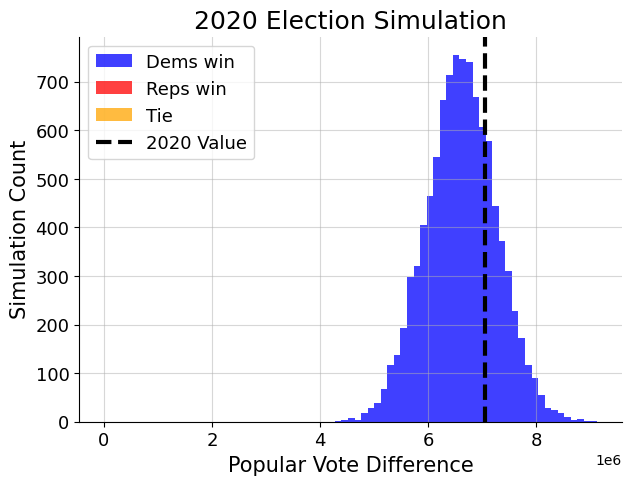

In [28]:
# collecting positive, negative and tie vote differences
pop_vote_diff = np.array(pop_vote_diff)
pop_pos_diff = pop_vote_diff[pop_vote_diff>0]
pop_neg_diff = pop_vote_diff[pop_vote_diff<0]
pop_tie_diff = pop_vote_diff[pop_vote_diff==0]

# plotting
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(pop_pos_diff, color = 'blue', alpha = 0.75, bins = 40, label = 'Dems win')
ax.hist(pop_neg_diff, color = 'red', alpha = 0.75, bins = 13, label = 'Reps win')
ax.hist(pop_tie_diff, color = 'orange', alpha = 0.75, bins = 1, label = 'Tie')

# labels
plt.title('2020 Election Simulation', fontsize = 18)
plt.xlabel('Popular Vote Difference', fontsize = 15)
plt.ylabel('Simulation Count', fontsize = 15)
# plt.axvline(x = 7059526, color = 'purple', linewidth = 3, label = '2020 Value')
plt.axvline(x = 7059526, color = 'black', linestyle = '--', linewidth = 3, label = '2020 Value')
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# plot clean up
plt.grid(alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

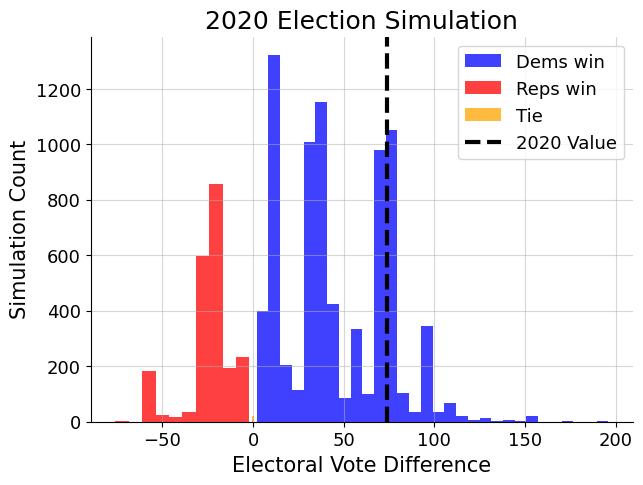

In [29]:
# collecting positive, negative and tie vote differences
elec_vote_diff = np.array(elec_vote_diff)
elec_pos_diff = elec_vote_diff[elec_vote_diff>0]
elec_neg_diff = elec_vote_diff[elec_vote_diff<0]
elec_tie_diff = elec_vote_diff[elec_vote_diff==0]

# plotting
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(elec_pos_diff, color = 'blue', alpha = 0.75, bins = 30, label = 'Dems win')
ax.hist(elec_neg_diff, color = 'red', alpha = 0.75, bins = 10, label = 'Reps win')
ax.hist(elec_tie_diff, color = 'orange', alpha = 0.75, bins = 1, label = 'Tie')
plt.axvline(x = 74, color = 'black', linestyle = '--', linewidth = 3, label = '2020 Value')

# labels and legends
plt.title('2020 Election Simulation', fontsize = 18)
plt.xlabel('Electoral Vote Difference', fontsize = 15)
plt.ylabel('Simulation Count', fontsize = 15)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# plot clean up
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha = 0.5)

plt.show()

<a id=section6> </a>
## Simulations: Probability of Electoral Misalignment

Probability that a party wins the electoral college and the other party wins the popular vote

$$ \text{Probability of Mis-Alignment} = \text{Prob}\,(e_D > e_R \cap n_D < n_R)+\text{Prob}\,(e_D < e_R \cap n_D > n_R)$$


$$ \text{Prob}\,(e_D > e_R \cap n_D < n_R) = \int_{\mathbb{R}^M} d^M \boldsymbol{\delta}\,d^M \textbf{n}\, \rho_{\text{margin}}(\boldsymbol{\delta})\,\rho_{\text{votes}}(\textbf{n}) \,\Theta\big(\boldsymbol{\lambda}\cdot H(\boldsymbol{\delta})\big)\Theta\left(-\boldsymbol{\delta}\cdot \textbf{n}\right)$$

$$ \text{Prob}\,(e_D < e_R \cap n_D > n_R) = \int_{\mathbb{R}^M} d^M \boldsymbol{\delta}\,d^M \textbf{n}\, \rho_{\text{margin}}(\boldsymbol{\delta})\,\rho_{\text{votes}}(\textbf{n}) \,\Theta\big(\boldsymbol{\lambda}\cdot H(\boldsymbol{-\delta})\big)\Theta\left(\boldsymbol{\delta}\cdot \textbf{n}\right)$$

In [30]:
##
# Democrat Calculation
##

# defining H function
H = lambda x: np.heaviside(x, 0)-np.heaviside(-x, 0)

# number of times to simulate election
Nsim = 10000

# lambda vector
lambda_vec = list()

# winning electoral college
dems_electoral_wins = list()

# winning popular vote
dems_popular_wins = list()

# winning electoral college and not winning popular vote
dems_elec_win_pop_loss = list()

# winning popular vote and not winning electoral vote
dems_pop_win_elec_loss = list()

# going through simulations
for _ in tqdm(range(Nsim)):
    
    # ballot count vector
    n_vector = sample_vector(n_mean_vec, n_cov_matrix)

    # difference vector
    delta_vector = sample_vector(delta_mean_vec, delta_cov_matrix)

    # popular vote 
    dems_popular_win = np.heaviside(np.dot(delta_vector,  n_vector), 0)
    reps_popular_win = np.heaviside(np.dot(-delta_vector, n_vector), 0)
    
    # electoral vote 
    dems_electoral_win = np.heaviside(np.dot(lambda_vector, H(delta_vector)), 0)
    reps_electoral_win = np.heaviside(np.dot(lambda_vector, H(-delta_vector)), 0)

    # appending election results
    dems_elec_win_pop_loss.append(dems_electoral_win*reps_popular_win)
    dems_pop_win_elec_loss.append(reps_electoral_win*dems_popular_win) 


  0%|          | 0/10000 [00:00<?, ?it/s]

In [31]:
# printing probabilities
print(f'Results')
print(f'***************')
print(f'Probability of Democrat Electoral Win and Republican Popular Win: {round(np.sum(dems_elec_win_pop_loss)/Nsim, 4)}')
print(f'Probability of Democrat Popular Win and Republican Electoral Win: {round(np.sum(dems_pop_win_elec_loss)/Nsim, 4)}')
res1 = np.sum(dems_elec_win_pop_loss)/Nsim
res2 = np.sum(dems_pop_win_elec_loss)/Nsim
print(f'Probability of Electoral Mis-Alignment: {round(res1 + res2, 4)}')
print(f'D-R Electoral College Bias: {round((res1 - res2)/(res1+res2), 4)}')

Results
***************
Probability of Democrat Electoral Win and Republican Popular Win: 0.0
Probability of Democrat Popular Win and Republican Electoral Win: 0.2157
Probability of Electoral Mis-Alignment: 0.2157
D-R Electoral College Bias: -1.0


### Resources and Links

- Electoral College Results: https://en.wikipedia.org/wiki/2020_United_States_presidential_election#Results_by_state
- Statewide Polling for 2020: https://en.wikipedia.org/wiki/Statewide_opinion_polling_for_the_2020_United_States_presidential_election
- 270toWin Statewide Polls for 2020: https://www.270towin.com/2020-polls-biden-trump/
- Electoral Project Election Data: https://www.electproject.org/election-data 